Epoch [0/10000], Loss: 0.7198
Epoch [1000/10000], Loss: 0.6931
Epoch [2000/10000], Loss: 0.6931
Epoch [3000/10000], Loss: 0.6931
Epoch [4000/10000], Loss: 0.6931
Epoch [5000/10000], Loss: 0.6931
Epoch [6000/10000], Loss: 0.6931
Epoch [7000/10000], Loss: 0.6931
Epoch [8000/10000], Loss: 0.6931
Epoch [9000/10000], Loss: 0.6931
Epoch [0/10000], Loss: 0.7677
Epoch [1000/10000], Loss: 0.6931
Epoch [2000/10000], Loss: 0.6931
Epoch [3000/10000], Loss: 0.6931
Epoch [4000/10000], Loss: 0.6931
Epoch [5000/10000], Loss: 0.6931
Epoch [6000/10000], Loss: 0.6931
Epoch [7000/10000], Loss: 0.6931
Epoch [8000/10000], Loss: 0.6931
Epoch [9000/10000], Loss: 0.6931


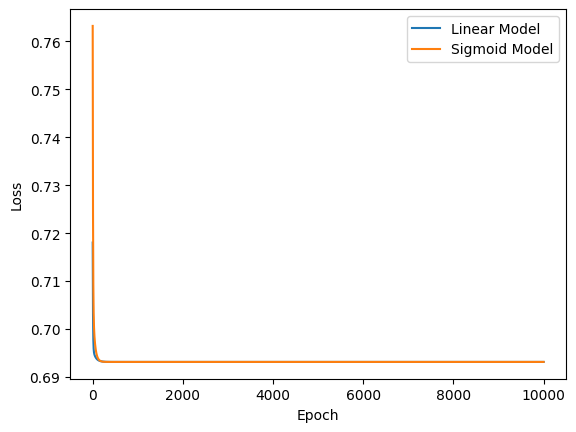

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define XOR model with linear output
class XORLinear(nn.Module):
    def __init__(self):
        super(XORLinear, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# Define XOR model with sigmoid output
class XORSigmoid(nn.Module):
    def __init__(self):
        super(XORSigmoid, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

# Instantiate models
linear_model = XORLinear()
sigmoid_model = XORSigmoid()

# Define loss functions
linear_criterion = nn.BCEWithLogitsLoss()
sigmoid_criterion = nn.BCELoss()

# Define optimizers
linear_optimizer = optim.SGD(linear_model.parameters(), lr=0.1)
sigmoid_optimizer = optim.SGD(sigmoid_model.parameters(), lr=0.1)

# Lists to store training loss
linear_losses = []
sigmoid_losses = []

# Training for linear model
num_epochs = 10000

for epoch in range(num_epochs):
    linear_optimizer.zero_grad()
    outputs = linear_model(X)
    loss = linear_criterion(outputs, y)
    loss.backward()
    linear_optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

    linear_optimizer.zero_grad()
    linear_outputs = linear_model(X)
    linear_loss = linear_criterion(linear_outputs, y)
    linear_loss.backward()
    linear_optimizer.step()
    linear_losses.append(linear_loss.item())

# Training for sigmoid model
for epoch in range(num_epochs):
    sigmoid_optimizer.zero_grad()
    outputs = sigmoid_model(X)
    loss = sigmoid_criterion(outputs, y)
    loss.backward()
    sigmoid_optimizer.step()

    if epoch % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

    sigmoid_optimizer.zero_grad()
    sigmoid_outputs = sigmoid_model(X)
    sigmoid_outputs = torch.squeeze(sigmoid_outputs)
    sigmoid_loss = sigmoid_criterion(sigmoid_outputs, y.squeeze())
    sigmoid_loss.backward()
    sigmoid_optimizer.step()
    sigmoid_losses.append(sigmoid_loss.item())

# Plot the training loss curves
plt.plot(range(num_epochs), linear_losses, label='Linear Model')
plt.plot(range(num_epochs), sigmoid_losses, label='Sigmoid Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()